<a href="https://colab.research.google.com/github/IshaqKHATTAK/Computer-Vision/blob/main/2020313_Muhammad_ishaq(ASSIGNMENT_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mounting the harddrive and setting it up
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Colab\ Notebooks/AI319\ Codes

/content/drive/MyDrive/Colab Notebooks/AI319 Codes


**1. Sampling an Image**

*   Upsampling - Increasing the no. of pixels
*   Downsampling - Decreasing the no. of pixels

In [8]:
#importing the required libraries
import numpy as np               
import matplotlib.pyplot as plt
from skimage.io import imshow, imread, imsave
from skimage.transform import downscale_local_mean, pyramid_expand
import skimage
import cv2 as cv
img1 = cv.imread('/content/lake.jpg')

In [9]:
#We will use downscale_local utility of the skimage for downsampling the image
#You could find the documentation here:
#https://scikit-image.org/docs/stable/api/skimage.transform.html#skimage.transform.downscale_local_mean

In [15]:
def up_sample(img,factr):
  image_dp = downscale_local_mean(image, factors=(factr, factr, 1)).astype(int)
  plt.imshow(image_dp)

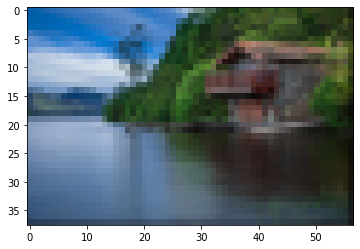

In [17]:
up_sample(img1,9)

In [5]:
image = imread('/content/lake.jpg')
shape = image.shape
factors = np.arange(1,10)
images_dp={}
for factor in factors:
  image_dp = downscale_local_mean(image, factors=(factor, factor, 1)).astype(int)
  print(image_dp.shape)
  images_dp[factor]=np.array(image_dp)

(340, 510, 3)
(170, 255, 3)
(114, 170, 3)
(85, 128, 3)
(68, 102, 3)
(57, 85, 3)
(49, 73, 3)
(43, 64, 3)
(38, 57, 3)


In [12]:
print(images_dp[1].shape)

(340, 510, 3)


In [13]:
def plot(images_dp):
  fig, axes = plt.subplots(3,3, figsize=(15, 15))
  axes = axes.ravel()
  for i, (factor, img) in enumerate(images_dp.items()):
    axes[i].imshow(img)
    axes[i].set_title('$Pixels={0}, factor={1}$'.format(img.shape[0]*img.shape[1], factor))
    fig.subplots_adjust(hspace=.5)


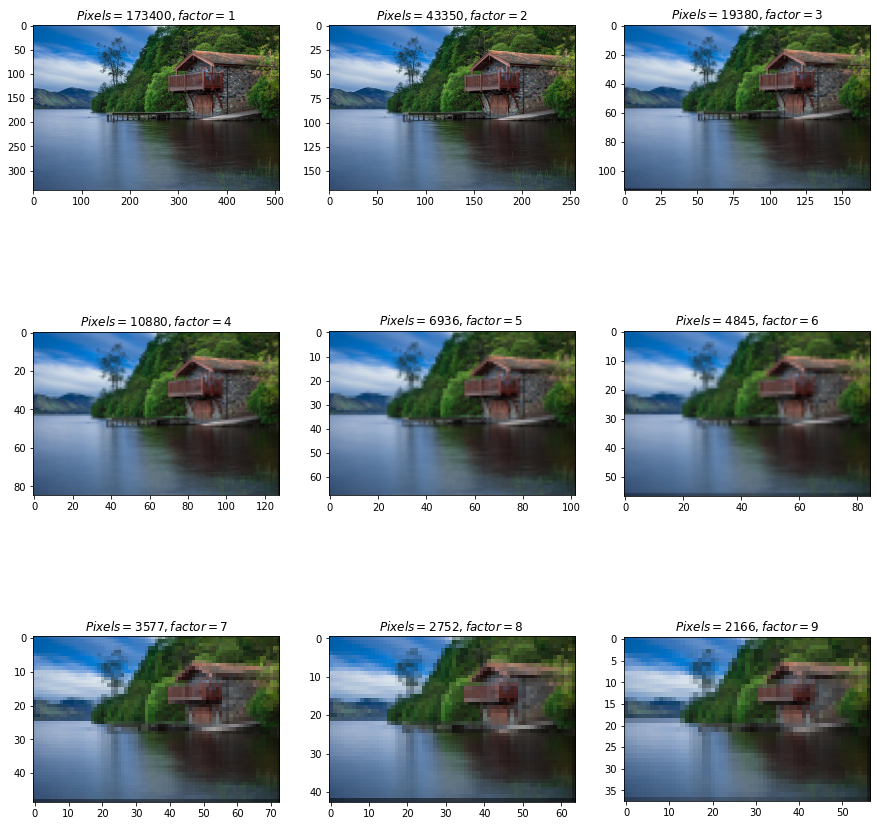

In [14]:
plot(images_dp)

In [ ]:
imsave('Downsmapled.jpg', images_dp[9].astype(np.uint8))

In [ ]:
#We will use downscale_local utility of the skimage for Upsampling the image
#You could find the documentation here:
#https://scikit-image.org/docs/stable/api/skimage.transform.html#skimage.transform.pyramid_expand

In [ ]:
import skimage

In [ ]:
image_dp = imread('Downsmapled.jpg')
image_dp_gray = skimage.color.rgb2gray(image_dp)
print(image_dp.shape)
upsampled_img = pyramid_expand(image_dp_gray, upscale=9)
#image_up = np.zeros((upsampled_img.shape[0], upsampled_img.shape[1], 3))
#image_up[:,:,0]=upsampled_img
#image_up[:,:,1]=upsampled_img
#image_up[:,:,2]=upsampled_img
image_up = skimage.color.gray2rgb(upsampled_img)

(38, 57, 3)


In [ ]:
image_up.shape

(342, 513, 3)

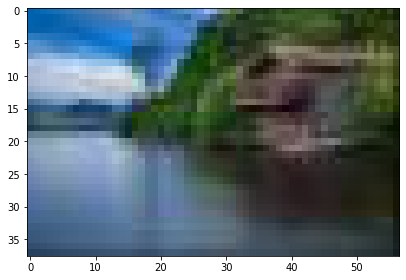

In [ ]:
imshow(image_dp)

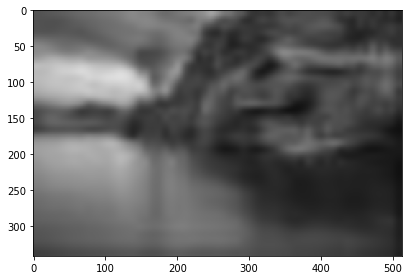

In [ ]:
imshow(image_up)

**Task 1:** Upsample the image with the correct color information and without smoothening.

Size of image after pyrUp:  (680, 1020, 3)


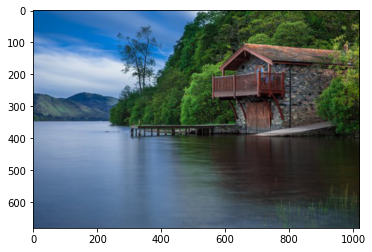

In [ ]:
import cv2

image1 = cv2.pyrUp(image)

print("Size of image after pyrUp: ", image1.shape)

plt.imshow( image1)

In [ ]:
image.shape#original image shape

(340, 510, 3)

In [ ]:
image1.shape#upsampled image shape

(680, 1020, 3)

**2. Color Spaces**

*   2a. RGB -Red, Green, Blue
*   2b. HSV - Hue, Saturation, Value
*   2c. LAB - Lightness, Red/Green, Blue/Yellow





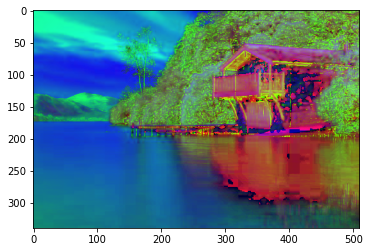

In [18]:
def to_hsv(img):
  image_HSV = skimage.color.rgb2hsv(img)
  plt.imshow(image_HSV)

to_hsv(img1)

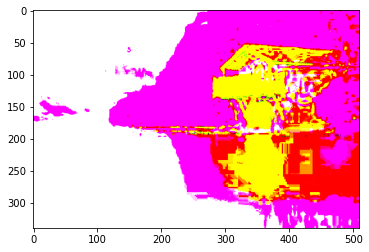

In [19]:
def to_lab(img):
  image_LAB = skimage.color.rgb2lab(img)
  plt.imshow(image_LAB)

to_lab(img1)

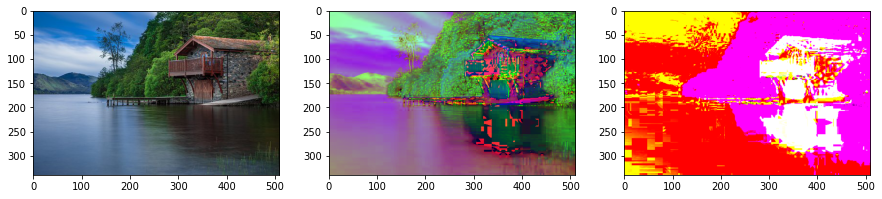

In [ ]:
#Image Conversion
image_RGB = imread('/content/lake.jpg')
image_HSV = skimage.color.rgb2hsv(image_RGB)
image_LAB = skimage.color.rgb2lab(image_RGB)

fig, axes = plt.subplots(1,3, figsize=(15, 15))
axes = axes.ravel()
for i, img in zip(range(0,3),[image_RGB, image_HSV, image_LAB]):
  axes[i].imshow((img))
  fig.subplots_adjust(hspace=.5)

**Task 2:** Analyze and plot every channel of the the above color spaces and see how they differ from each other.

In [ ]:
(B, G, R) = cv2.split(image_RGB)

red


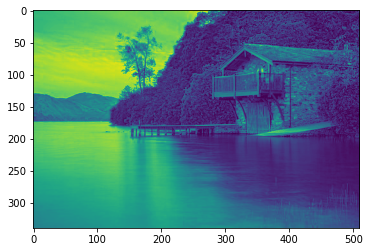

In [ ]:
plt.imshow( R)
print('red')

GREEN


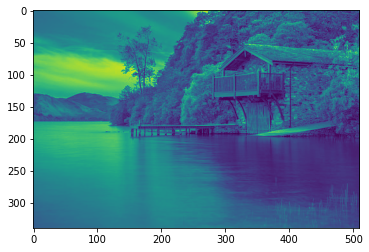

In [ ]:
plt.imshow( G)
print('GREEN')

BLUE


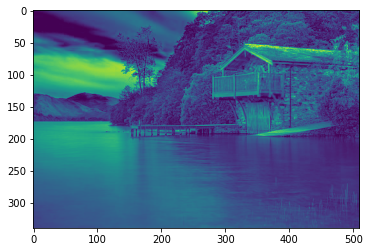

In [ ]:
plt.imshow( B)
print('BLUE')

In [ ]:
(B, G, R) = cv2.split(image_HSV)

BLUE


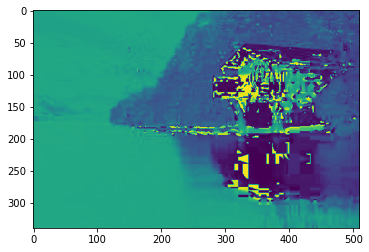

In [ ]:
plt.imshow( B)
print('BLUE')

GREEN


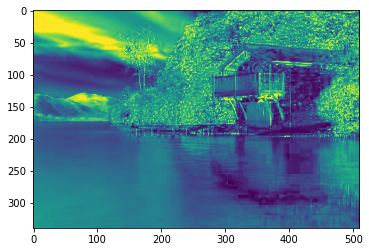

In [ ]:
plt.imshow( G)
print('GREEN')

RED


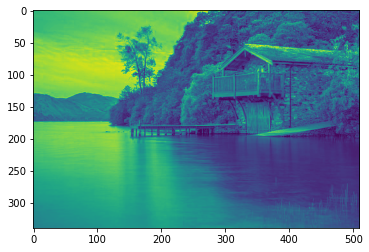

In [ ]:
plt.imshow( R)
print('RED')

**3. Image Compositing and Matting**


*   Create a binary Mask of an image
    1. Otsu Algorithm:<br>
    https://en.wikipedia.org/wiki/Otsu%27s_method
        


> Indented block


        1a. Compute histogram and probabilities of each intensity level (in order to d).

        1b. Set initial class(pixel) probability and pixel class mean. 
        
        1c. Loop through threshold=1...Max Intensity:
          
          1ca. Update the class probilities and class means<br>
          
          1cb. Compute the inter-class variance
        
        1d. Desired threshold corresponds to the maximum inter-class variance.




*   Matting with binary mask



In [22]:
import skimage
from skimage import filters
import cv2 as cv

camera = skimage.data.camera()

def mattin(img):
  val = filters.threshold_otsu(camera) #find the threasholding value(middel value by the applied process)
  mask = camera.copy() #copy the iamge
  mask[camera < val] = 255 # if camera value is less than val put 255 over there
  mask[camera > val] = 0
#Matting
  masked = cv.bitwise_and(camera, mask) #bit wise operator and store in masked
  masked[mask==0] = 255 #the whole yellow area in the given maksed iamge
  return masked

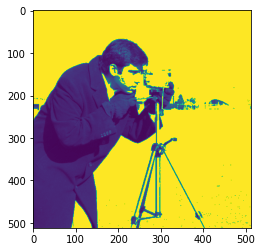

In [23]:
plt.imshow(mattin(camera))

/usr/local/lib/python3.9/dist-packages/skimage/_shared/utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


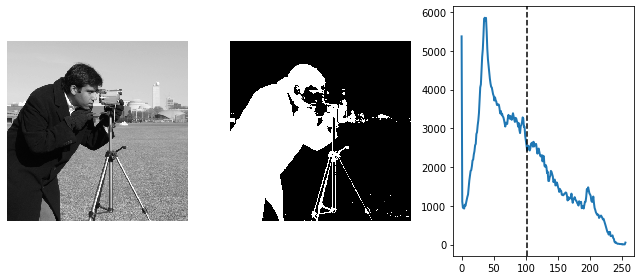

In [24]:
val = filters.threshold_otsu(camera) #find the threasholding value(middel value by the applied process)
mask = camera.copy() #copy the iamge
mask[camera < val] = 255 # if camera value is less than val put 255 over there
mask[camera > val] = 0
#Matting
masked = cv.bitwise_and(camera, mask) #bit wise operator and store in masked
masked[mask==0] = 255 #the whole yellow area in the given maksed iamge





#Code Reference from https://scipy-lectures.org/packages/scikit-image/auto_examples/plot_threshold.html
hist, bins_center = skimage.exposure.histogram(image)
plt.figure(figsize=(9, 4))
plt.subplot(131)
plt.imshow(camera, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(132)
plt.imshow(mask, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(133)
plt.plot(bins_center, hist, lw=2)
plt.axvline(val, color='k', ls='--')

plt.tight_layout()
plt.show()

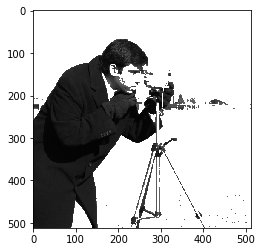

In [25]:
plt.figure(figsize=(9, 4))
plt.imshow(masked, cmap='gray', interpolation='nearest')

**Task 3:** Build a almost perfect mask for the image and perform the matting so only the person with camera should be extracted form the origial image

In [ ]:



from skimage import data
import numpy as np
from PIL import Image



# Make mask of where image is less than mid-grey
mask = camera<128

# Set image black everywhere it was less than mid-grey
camera[mask] = 0

# Set image mid-grey everywhere it was mid-grey or brighter
camera[~mask] = 128

# Convert to PIL image and save
Image.fromarray(camera).save('res.png')

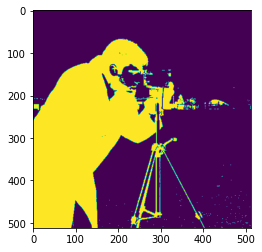

In [ ]:
plt.imshow(mask)

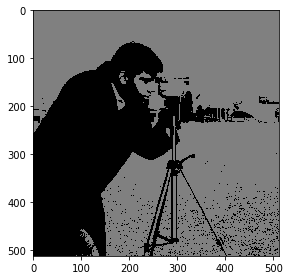

In [ ]:
res = '/content/res.png'

imshow(res, cmap='gray')

**4. Filtering an image**


*   Blur
*   Sharpened
*   Dilated
*   Erosion


https://towardsdatascience.com/image-processing-part-3-dbf103622909






<ipython-input-35-20f12734af9b>:6: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0. Please use `channel_axis` instead.
  filtered_img = skimage.filters.gaussian(img, sigma=sigm, multichannel=True)


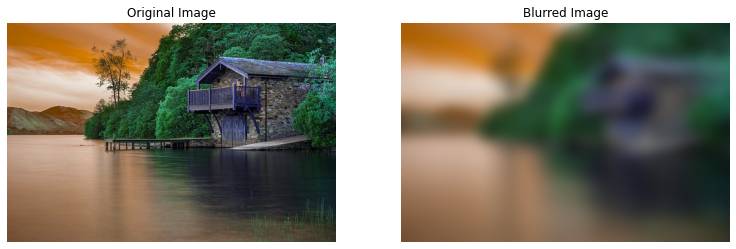

In [35]:
#Gaussain Blur
#http://man.hubwiz.com/docset/Scikit-image.docset/Contents/Resources/Documents/api/skimage.filters.html#skimage.filters.gaussian
#https://en.wikipedia.org/wiki/Gaussian_filter
#image = imread('/content/lake.jpg')
def blur(img,sigm):
  filtered_img = skimage.filters.gaussian(img, sigma=sigm, multichannel=True)
  plt.figure(figsize=(20, 20))
  plt.subplot(131)
  plt.imshow(img)
  plt.title('Original Image')
  plt.axis('off')
  plt.subplot(132)
  plt.imshow(filtered_img)
  plt.title('Blurred Image')
  plt.axis('off')

blur(img1,10)
#_____________________________________________BLUR_____________________________________
#  take the image and the input filter or structure element and everage them accordingly
#we need to always normalize the input image to one.

<ipython-input-42-9b7af85970ae>:4: FutureWarning: `multichannel` is a deprecated argument name for `unsharp_mask`. It will be removed in version 1.0. Please use `channel_axis` instead.
  filtered_im = skimage.filters.unsharp_mask(image, radius=5, amount=10.0, multichannel=True)


(-0.5, 509.5, 339.5, -0.5)

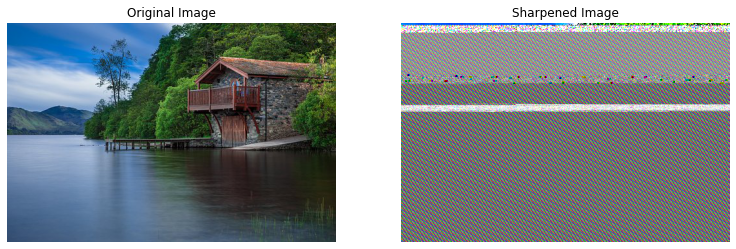

In [42]:
#Image Sharpening
#https://github.com/scikit-image/scikit-image/blob/v0.19.2/skimage/filters/_unsharp_mask.py#L19-L146
image = imread('/content/lake.jpg')
filtered_im = skimage.filters.unsharp_mask(image, radius=5, amount=10.0, multichannel=True)
plt.figure(figsize=(20, 20))
plt.subplot(131)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.subplot(132)
plt.imshow(filtered_im)
plt.title('Sharpened Image')
plt.axis('off')
#sharpning increase the pixel intenisty/value unlike bluring which decrease the pixel value/intenisty.

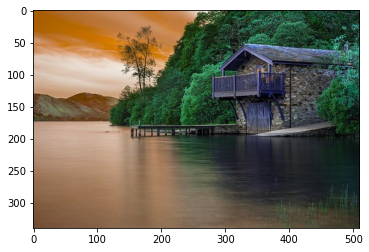

In [43]:
plt.imshow(img1)

(-0.5, 509.5, 339.5, -0.5)

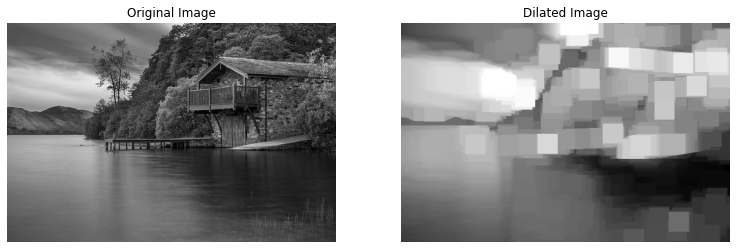

In [39]:
#Image Dilation
#https://docs.opencv.org/3.4/db/df6/tutorial_erosion_dilatation.html
image = imread('/content/lake.jpg')
image_gray = skimage.color.rgb2gray(image)
image_gray=image_gray/255
kernel = np.ones((7, 7), np.uint8)
dilated_img = cv.dilate(image_gray, kernel, iterations=5)
plt.figure(figsize=(20, 20))
plt.subplot(131)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(132)
plt.imshow(dilated_img, cmap='gray')
plt.title('Dilated Image')
plt.axis('off')
#image dialation acutally dialate/make bolder the pixle by taking the input filter/structure elemnt and replace it with either 1 or 0
#and the same thing happen to image erosion 
#erosion put 1 if all the pixel value of image and structure elemnt amtch 
#dialation put 1 if at least one element match.

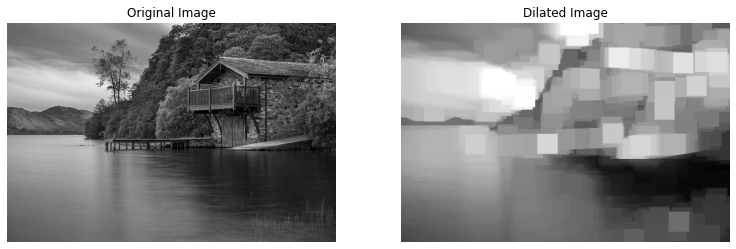

In [44]:
def dilated(img,k_size,iter):
  image_gray = skimage.color.rgb2gray(img)
  image_gray=image_gray/255
  kernel = np.ones((k_size, k_size), np.uint8)
  dilated_img = cv.dilate(image_gray, kernel, iterations=iter)
  plt.figure(figsize=(20, 20))
  plt.subplot(131)
  plt.imshow(image_gray, cmap='gray')
  plt.title('Original Image')
  plt.axis('off')
  plt.subplot(132)
  plt.imshow(dilated_img, cmap='gray')
  plt.title('Dilated Image')
  plt.axis('off')

dilated(img1,7,5)

(-0.5, 509.5, 339.5, -0.5)

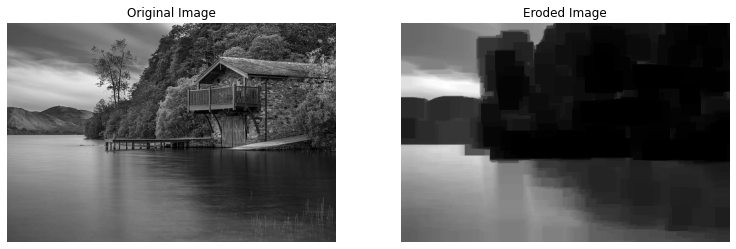

In [38]:
#Image Erosion
import cv2 as cv
#https://docs.opencv.org/3.4/db/df6/tutorial_erosion_dilatation.html
image = imread('/content/lake.jpg')
image_gray = skimage.color.rgb2gray(image)
image_gray=image_gray/255
kernel = np.ones((7, 7), np.uint8)
eroded_img = cv.erode(image_gray, kernel, iterations=5)
plt.figure(figsize=(20, 20))
plt.subplot(131)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(132)
plt.imshow(eroded_img, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')

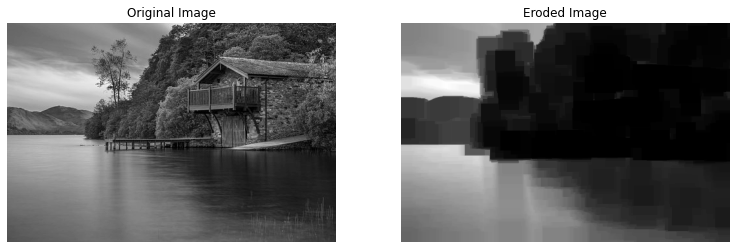

In [45]:
def eroded(img,k_size,itr):
  image_gray = skimage.color.rgb2gray(img)
  image_gray=image_gray/255
  kernel = np.ones((k_size, k_size), np.uint8)
  eroded_img = cv.erode(image_gray, kernel, iterations=itr)
  plt.figure(figsize=(20, 20))
  plt.subplot(131)
  plt.imshow(image_gray, cmap='gray')
  plt.title('Original Image')
  plt.axis('off')
  plt.subplot(132)
  plt.imshow(eroded_img, cmap='gray')
  plt.title('Eroded Image')
  plt.axis('off')

eroded(img1,7,5)

**Task 4:** Take the eroded image and see if you can get the original image after dialating. If you can't why?

In [ ]:
print(eroded_img)

[[0.00120053 0.00120053 0.00120053 ... 0.00012102 0.00012102 0.00012102]
 [0.00120053 0.00120053 0.00120053 ... 0.00012102 0.00012102 0.00012102]
 [0.00120053 0.00120053 0.00120053 ... 0.00012102 0.00012102 0.00012102]
 ...
 [0.00109186 0.00109186 0.00109186 ... 0.0006066  0.0006066  0.0006066 ]
 [0.00109186 0.00109186 0.00109186 ... 0.0006066  0.0006066  0.0006066 ]
 [0.00109186 0.00109186 0.00109186 ... 0.0006066  0.0006066  0.0006066 ]]


In [ ]:
print(image_gray)

[[0.00129706 0.00129706 0.00129706 ... 0.00045936 0.00044182 0.00048463]
 [0.00127625 0.00127625 0.00127625 ... 0.00097555 0.00118543 0.0004956 ]
 [0.00125769 0.00125769 0.00125769 ... 0.00135999 0.00125455 0.00114912]
 ...
 [0.00112262 0.00112262 0.00112262 ... 0.00078802 0.00075727 0.00072651]
 [0.00110724 0.00110724 0.00112262 ... 0.00078802 0.00075727 0.00074189]
 [0.00109186 0.00110724 0.00110724 ... 0.00077265 0.00072651 0.00071113]]


In [ ]:
#we can't get the original image from the eroded image because we have lose some fo the essential information of
#the original image and also we do not know the exact pixel value which was in original image.

In [ ]:
# Apply identity kernel
kernel1 = np.array([[0, 0, 0],
                    [0, 1, 0],
                    [0, 0, 0]])
 
identity = cv2.filter2D(src=image, ddepth=-1, kernel=kernel1)